# Running Time experiments for Q-MP, Q-OMPb, Q-MPc

## Read Data from files

In [116]:
file_name = 'data_dump_0.01_QMPb.json'
size = 550

In [117]:
import json
import numpy as np

with open(file_name) as f:
    data = json.load(f)

c = list(data["class_k"])
c_mean = list()
c_std = list()
q = list(data["quant_k"])
q_mean = list()
q_std = list()
sim_mean = list()
sim_std = list()
for i in range(0, len(c),1):
    c_mean.append(np.mean(c[i]))
    c_std.append(np.std(c[i]))
    q_mean.append(np.mean(q[i]))
    q_std.append(np.std(q[i]))
    sim_mean.append(c_mean[i]/q_mean[i])
    sim_std.append(c_std[i]/q_std[i])

In [118]:
c_mean

[15.59, 29.13, 42.2, 55.4, 68.8, 83.06, 95.1, 109.69, 123.87, 135.8]

In [119]:
c_std

[4.93982793222598,
 6.231620976920853,
 5.711392124517454,
 8.264381404557755,
 8.361817984146748,
 8.69461902558128,
 8.649277426467485,
 12.540091706203746,
 11.631556215743446,
 11.385956261992225]

In [120]:
sim_mean

[0.9961661341853035,
 1.0,
 0.9997630893153282,
 1.0056271555636231,
 0.9988385598141696,
 0.997478083343341,
 0.999684642068748,
 1.0,
 0.9976643041237114,
 0.9996319470003682]

In [121]:
sim_std

[1.0254102207731788,
 0.9903558634040486,
 0.9855155542368625,
 1.0403731462508823,
 0.9811961673358057,
 0.9818500543736753,
 1.0036078554363423,
 1.0156870890913003,
 0.9599607949388426,
 1.0311424746654532]

In [122]:
np.mean(sim_mean)

0.9994853915414593

In [123]:
np.std(sim_mean)

0.0023910397451539236

In [124]:
import scipy as sc
sc.stats.shapiro(c[4])

ShapiroResult(statistic=0.9885090589523315, pvalue=0.5464661717414856)

In [125]:
sc.stats.shapiro(q[4])

ShapiroResult(statistic=0.9881303906440735, pvalue=0.5178717374801636)

In [126]:
sc.stats.shapiro(sim_mean)

ShapiroResult(statistic=0.8264694213867188, pvalue=0.030337443575263023)

In [127]:
quant_run = data["quant_runtime"]
clas_run = data["class_runtime"]

In [128]:
quant_plt = list()
for i in range(0, len(quant_run), 1):
    quant_plt.append(quant_run[i][0])
quant_plt

[15790449113.574713,
 109898362637.95604,
 351170023028.0612,
 772672184785.4683,
 1481274929135.4197,
 2525190577008.2173,
 3777211680573.677,
 5636861306854.048,
 8024545446389.539,
 10563334632708.0]

In [129]:
class_plt = list()
div=list()
for i in range(0, len(clas_run), 1):
    class_plt.append(clas_run[i][0])
    div.append(quant_plt[i]/class_plt[i])
class_plt

[77950.0,
 582600.0,
 1899000.0,
 4432000.0,
 8600000.0,
 14950800.0,
 23299500.0,
 35100800.0,
 50167350.0,
 67900000.0]

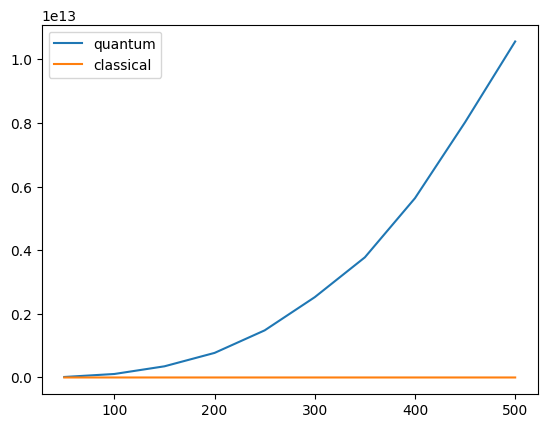

In [130]:
from matplotlib import pyplot as plt

components = np.arange(50, size, 50)
plt.plot(components, quant_plt, label="quantum")
plt.plot(components, class_plt, label="classical")
plt.legend()
plt.show()

In [131]:
div

[202571.50883354346,
 188634.33339848273,
 184923.65614958463,
 174339.3918739775,
 172241.27082969996,
 168900.0305674758,
 162115.568169861,
 160590.67904019417,
 159955.53774296507,
 155571.9386260383]

### Estimated complexity with constants trends

In [132]:
f = 210000
j = int((f/50)-1)
n = np.arange(50, f, 50, dtype='int64')
m = np.array(2*n, dtype='int64')
k = np.array(n/3.7, dtype='int64')

In [133]:
class_run_apx = list()
for i in range(0, j, 1):
    class_run_apx.append(n[i]*m[i]*k[i])

In [134]:
class_run_apx

[65000,
 540000,
 1800000,
 4320000,
 8375000,
 14580000,
 23030000,
 34560000,
 49005000,
 67500000,
 89540000,
 116640000,
 147875000,
 185220000,
 227250000,
 276480000,
 330905000,
 393660000,
 462080000,
 540000000,
 624015000,
 718740000,
 819950000,
 933120000,
 1053125000,
 1186380000,
 1326780000,
 1481760000,
 1644155000,
 1822500000,
 2008490000,
 2211840000,
 2423025000,
 2653020000,
 2891000000,
 3149280000,
 3422500000,
 3703860000,
 4007835000,
 4320000000,
 4656370000,
 5000940000,
 5371345000,
 5749920000,
 6156000000,
 6570180000,
 7013575000,
 7464960000,
 7947310000,
 8437500000,
 8960445000,
 9491040000,
 10056220000,
 10628820000,
 11237875000,
 11854080000,
 12508650000,
 13170060000,
 13871785000,
 14580000000,
 15330520000,
 16087140000,
 16888095000,
 17694720000,
 18547750000,
 19405980000,
 20312725000,
 21224160000,
 22186260000,
 23152500000,
 24171595000,
 25194240000,
 26271970000,
 27380000000,
 28490625000,
 29659760000,
 30830800000,
 32062680000,
 33

In [135]:
quantum_run_apx = list()
div=list()
for i in range(0, j, 1):
    quantum_run_apx.append(k[i] * 2 * np.sqrt(m[i])*(1/0.1) * (3+i) * np.log10(1/0.1)**2 * np.log10(n[i]*m[i]) *np.log10(6*k[i]*m[i]/0.1)**2)
    div.append(quantum_run_apx[i]/class_run_apx[i])

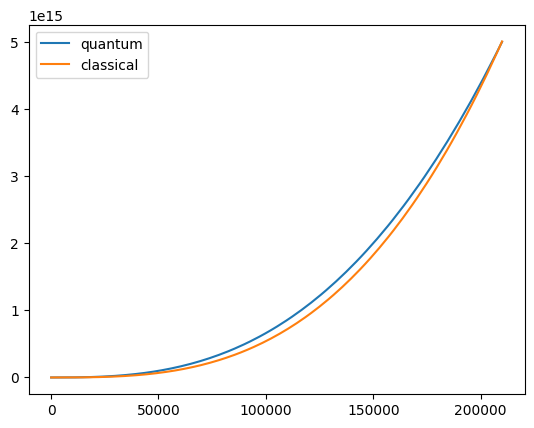

In [136]:
from matplotlib import pyplot as plt

plt.plot(n, quantum_run_apx, label="quantum")
plt.plot(n, class_run_apx, label="classical")
plt.legend()
plt.show()

In [137]:
div[-1]

0.9987226610102251